In [1]:
#Importing libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading dataset
df = pd.read_csv('EV_dataset.csv')
df

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [5]:
df.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

In [6]:
df.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [7]:
#check the no of columns and its name
df.columns

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
       'Total Salary', 'Make', 'Price'],
      dtype='object')

In [8]:
#to print unique values of each column
for col in ['Profession','Marrital Status','Education','Personal loan','House Loan','Wife Working','Make']:
    print(col,':',df[col].unique())

Profession : ['Salaried' 'Business']
Marrital Status : ['Single' 'Married']
Education : ['Post Graduate' 'Graduate']
Personal loan : ['Yes' 'No']
House Loan : ['No' 'Yes']
Wife Working : ['No' 'Yes' 'm']
Make : ['i20' 'Ciaz' 'Duster' 'City' 'SUV' 'Baleno' 'Verna' 'Luxuray' 'Creata']


In [9]:
#wife working 'm' is incorrect so finding rows with wife working=m
df.loc[df['Wife Working']== 'm']

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
11,35,Salaried,Married,Graduate,4,Yes,Yes,m,1400000,0,1400000,Baleno,700000


In [10]:
#To correct the row
df = df.replace(to_replace='m', value='No')


In [11]:
df.loc[11]

Age                       35
Profession          Salaried
Marrital Status      Married
Education           Graduate
No of Dependents           4
Personal loan            Yes
House Loan               Yes
Wife Working              No
Salary               1400000
Wife Salary                0
Total Salary         1400000
Make                  Baleno
Price                 700000
Name: 11, dtype: object

### Behavioural Analysis

In [12]:
correlations = df.corr()
print(correlations)

                       Age  No of Dependents    Salary  Wife Salary  \
Age               1.000000          0.543675  0.656442     0.288546   
No of Dependents  0.543675          1.000000  0.273921     0.102010   
Salary            0.656442          0.273921  1.000000     0.347934   
Wife Salary       0.288546          0.102010  0.347934     1.000000   
Total Salary      0.587082          0.234379  0.841545     0.799238   
Price             0.376661          0.088822  0.547630     0.635858   

                  Total Salary     Price  
Age                   0.587082  0.376661  
No of Dependents      0.234379  0.088822  
Salary                0.841545  0.547630  
Wife Salary           0.799238  0.635858  
Total Salary          1.000000  0.717442  
Price                 0.717442  1.000000  


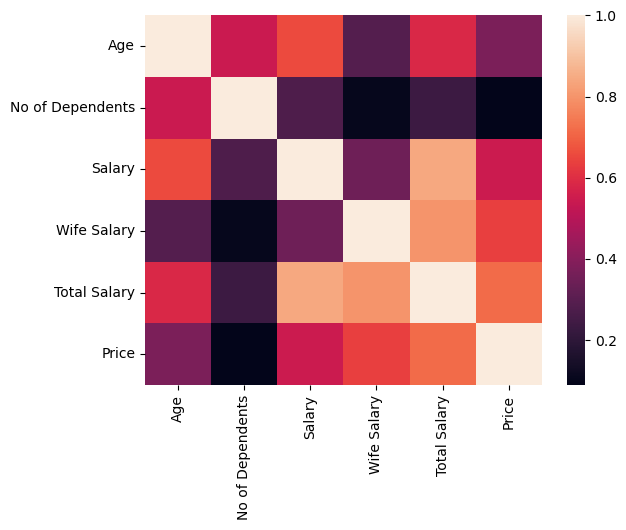

In [13]:
sns.heatmap(correlations)
plt.show()

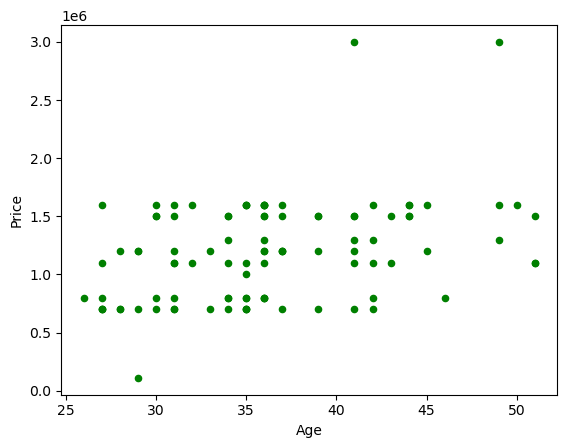

In [14]:
df.plot(kind='scatter', x='Age', y='Price', color='green');

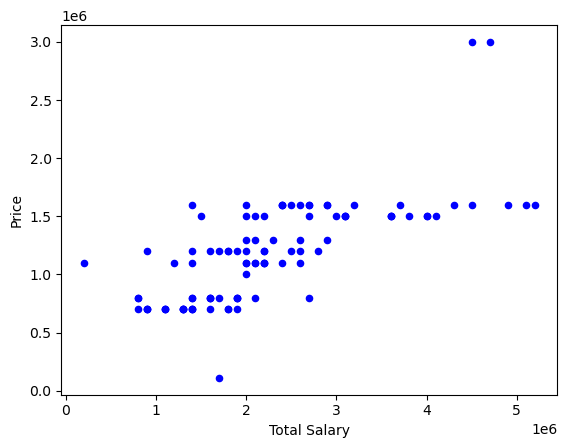

In [15]:
df.plot(kind='scatter', x='Total Salary', y='Price', color='blue');

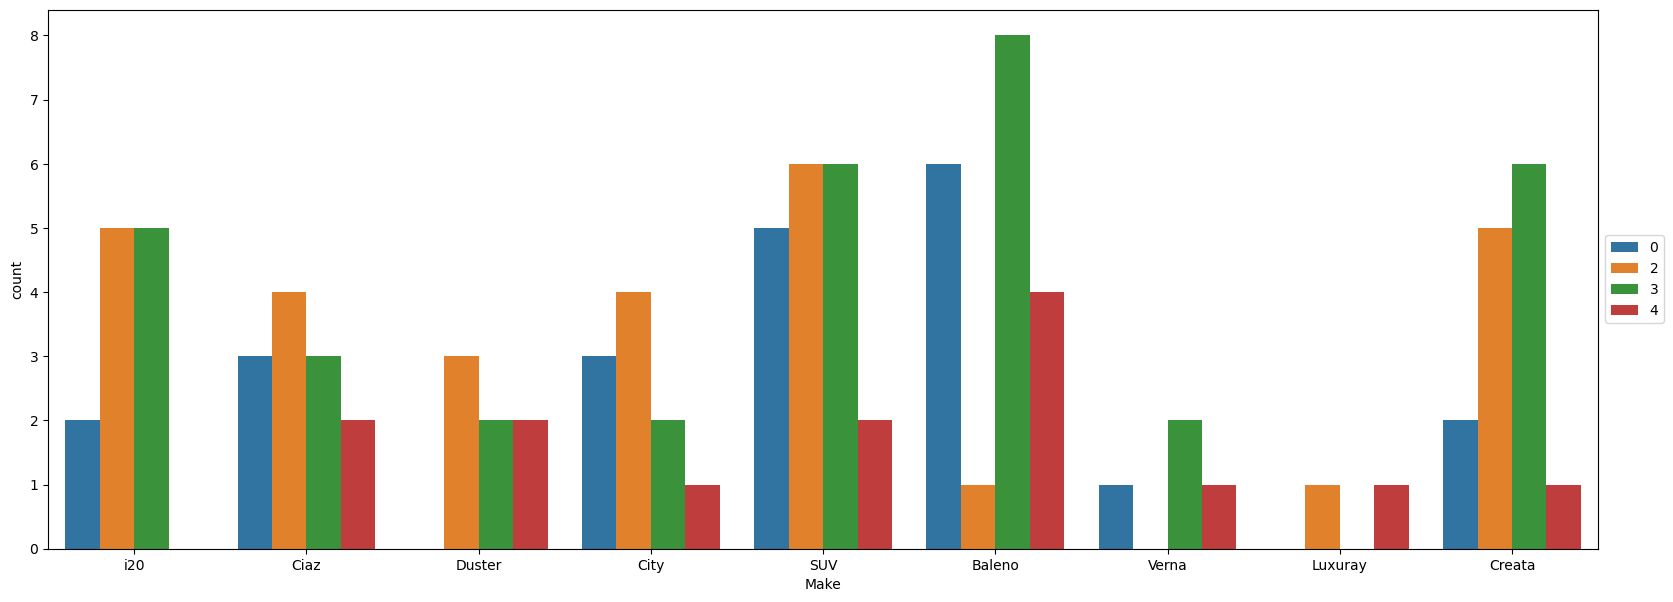

In [16]:
plt.figure(figsize=(20,7))
sns.countplot(data=df, x="Make",hue="No of Dependents")
plt.legend(loc="center left",bbox_to_anchor=(1,0.5))

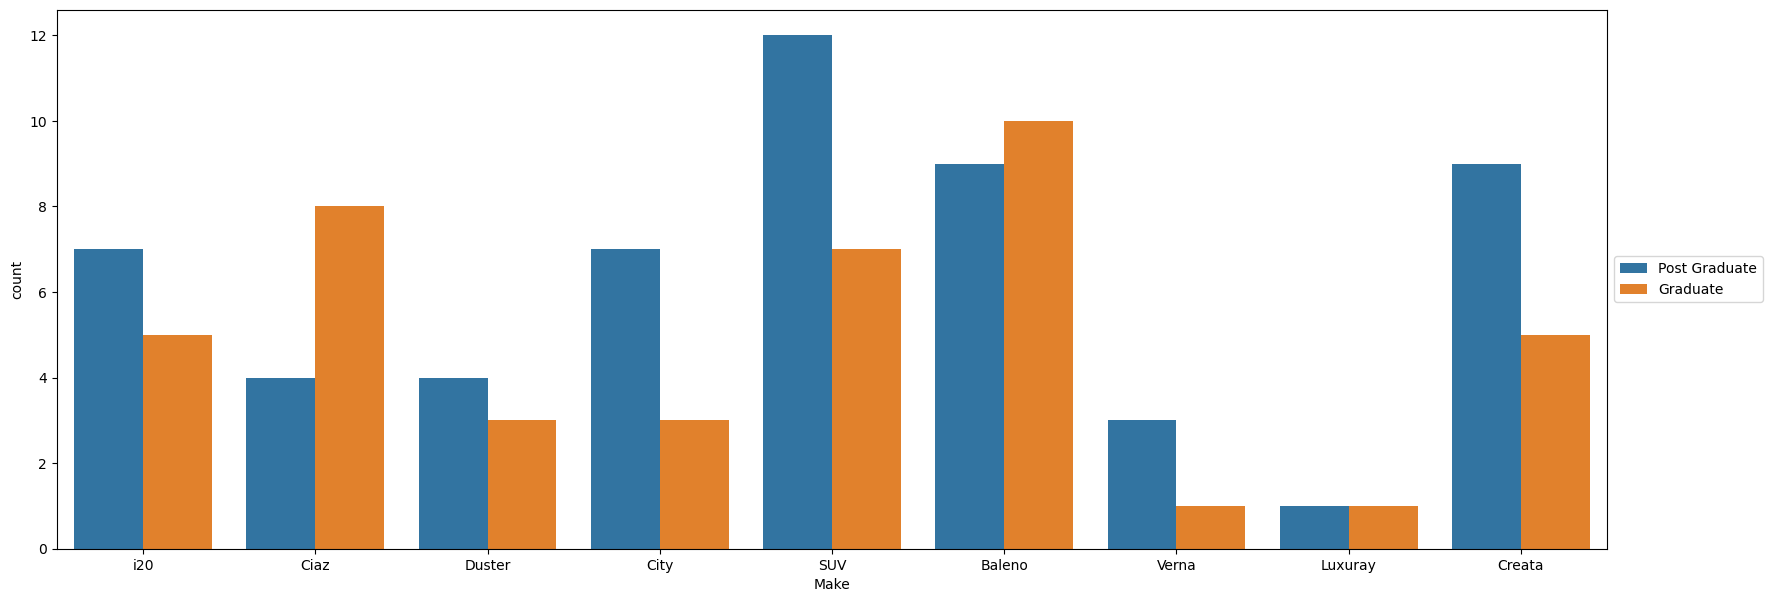

In [17]:
plt.figure(figsize=(20,7))
sns.countplot(data=df, x="Make",hue="Education")
plt.legend(loc="center left",bbox_to_anchor=(1,0.5))

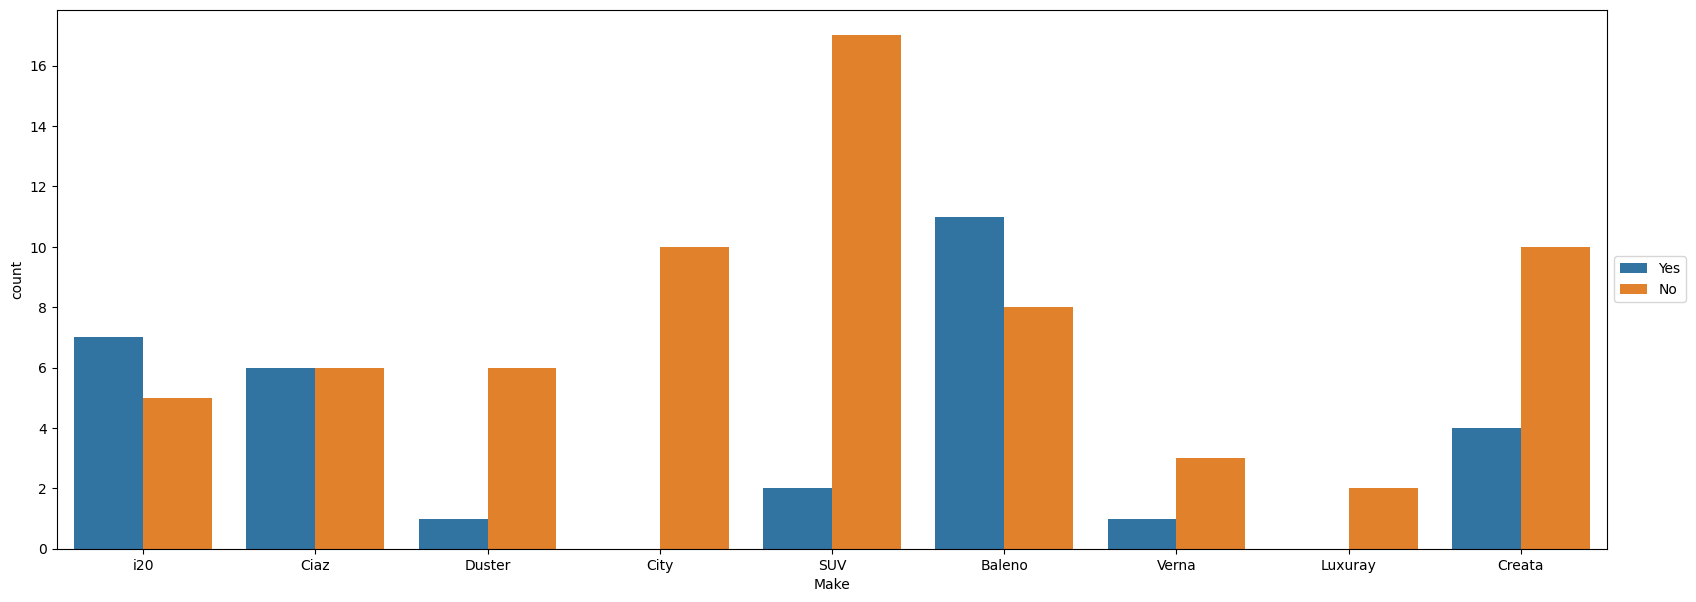

In [18]:
plt.figure(figsize=(20,7))
sns.countplot(data=df, x="Make",hue="Personal loan")
plt.legend(loc="center left",bbox_to_anchor=(1,0.5))

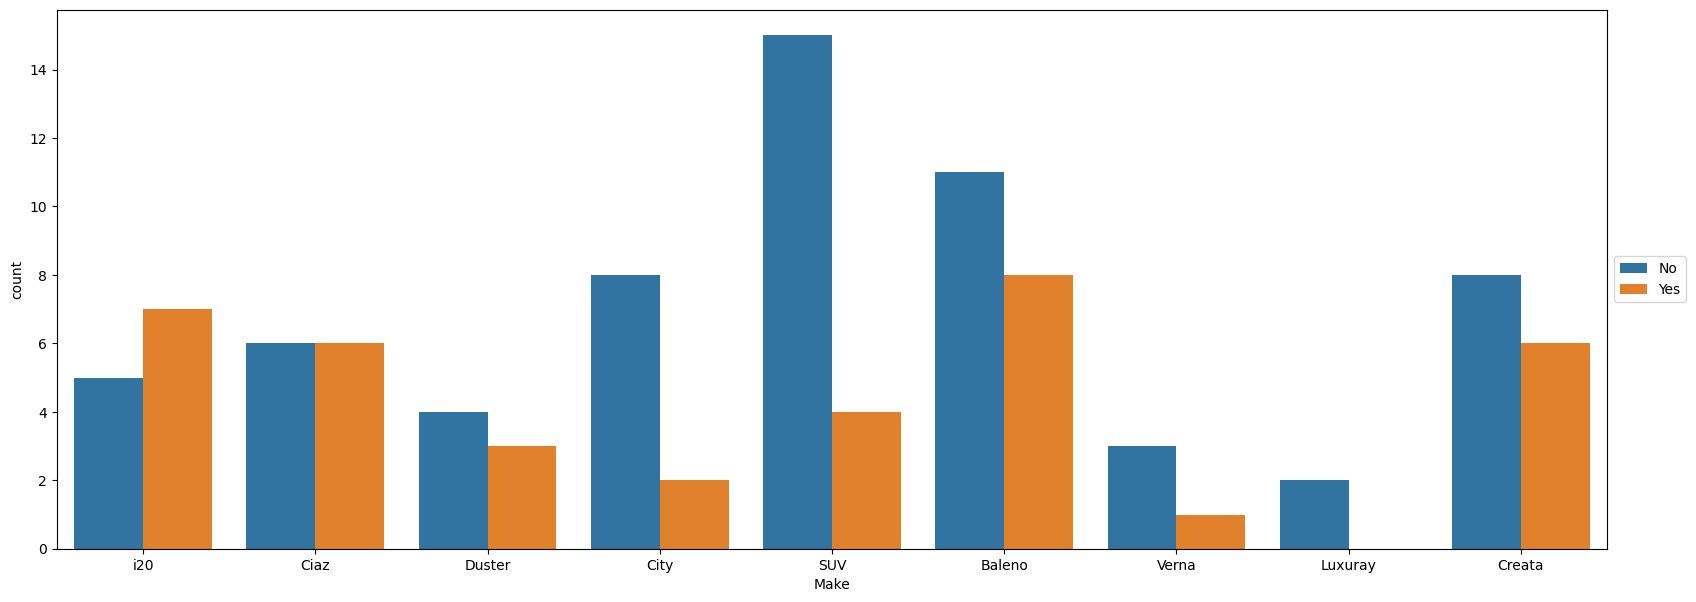

In [19]:
plt.figure(figsize=(20,7))
sns.countplot(data=df, x="Make",hue="House Loan")
plt.legend(loc="center left",bbox_to_anchor=(1,0.5))

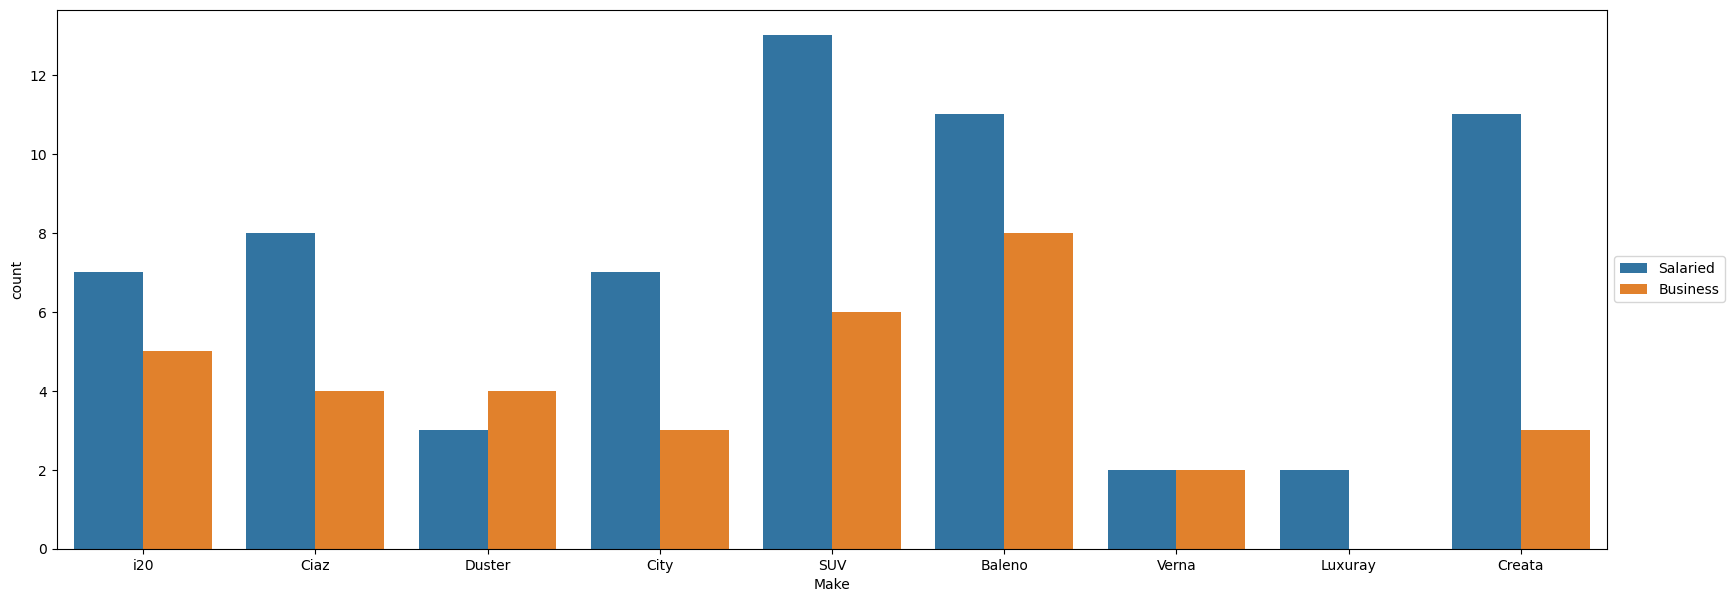

In [20]:
plt.figure(figsize=(20,7))
sns.countplot(data=df, x="Make",hue="Profession")
plt.legend(loc="center left",bbox_to_anchor=(1,0.5))

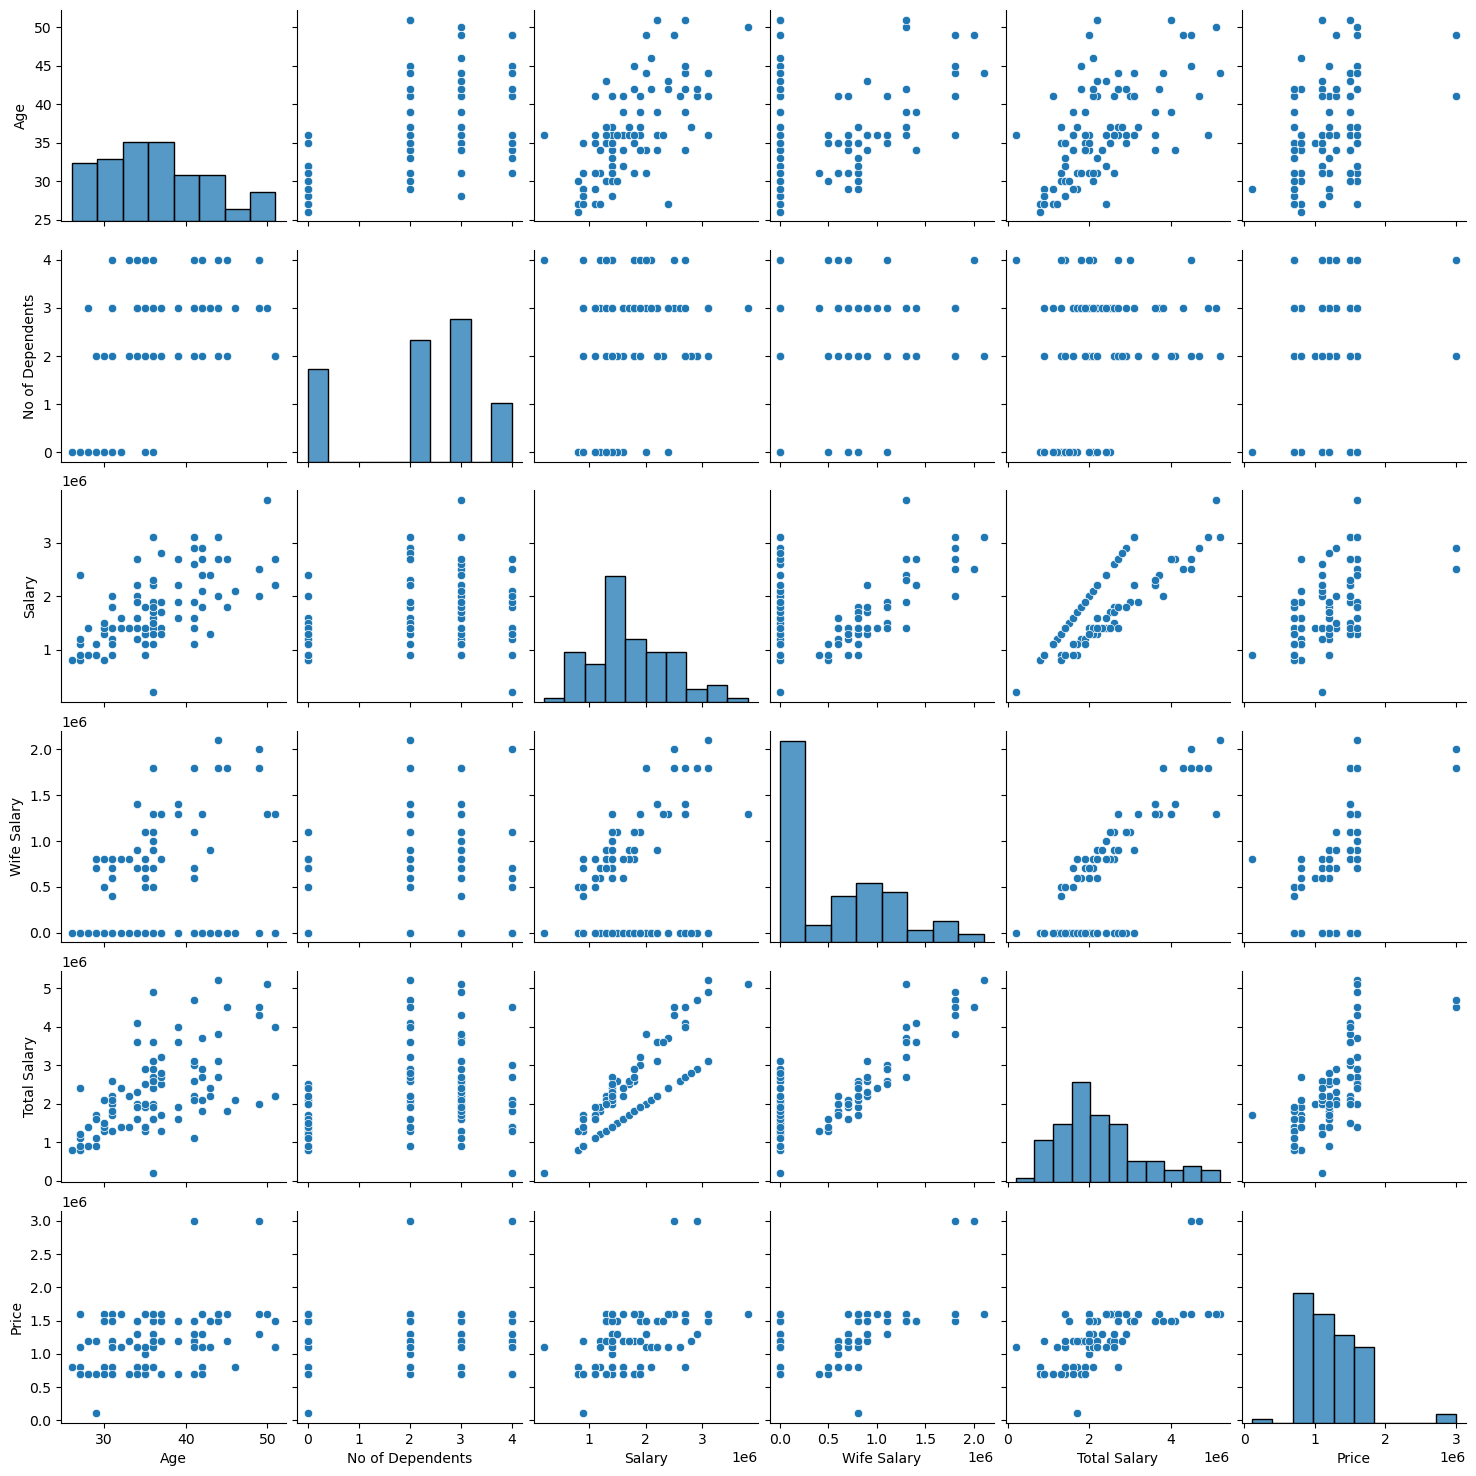

In [21]:
sns.pairplot(df)

### Building ML model

In [33]:
#Converting all data into numerical format
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['Profession']=le.fit_transform(df['Profession'])
df['Marrital Status']=le.fit_transform(df['Marrital Status'])
df['Education']=le.fit_transform(df['Education'])
df['Profession']=le.fit_transform(df['Profession'])
df['Personal loan']=le.fit_transform(df['Personal loan'])
df['House Loan']=le.fit_transform(df['House Loan'])
df['Wife Working']=le.fit_transform(df['Wife Working'])

In [34]:
df

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,1,1,1,0,1,0,0,800000,0,800000,i20,800000
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,Ciaz,1000000
2,45,0,0,0,4,1,1,0,1800000,0,1800000,Duster,1200000
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,City,1200000
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,SUV,1600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,0,1,0,0,0,0,0,2400000,0,2400000,SUV,1600000
95,50,1,0,1,3,0,0,1,3800000,1300000,5100000,SUV,1600000
96,51,0,0,0,2,1,1,0,2200000,0,2200000,Ciaz,1100000
97,51,1,0,1,2,0,0,1,2700000,1300000,4000000,Creata,1500000


#### K-Means Clustering

In [36]:
df = df.drop(['Make'], axis=1)
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,27,1,1,1,0,1,0,0,800000,0,800000,800000
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,1000000
2,45,0,0,0,4,1,1,0,1800000,0,1800000,1200000
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,1200000
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,1600000


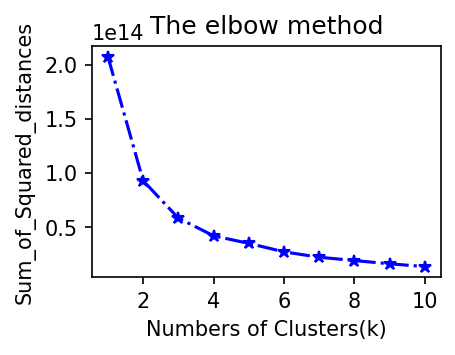

In [37]:
from sklearn.cluster import KMeans
Sum_of_Squared_distances = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(df)
    Sum_of_Squared_distances.append(kmeans.inertia_)
    
plt.figure(figsize=(3,2), dpi=150)
plt.plot(range(1, 11), Sum_of_Squared_distances, 'b*-.')
plt.title('The elbow method')
plt.xlabel('Numbers of Clusters(k)')
plt.ylabel('Sum_of_Squared_distances')
plt.show()